In [1]:
# 필요한 기본 패키지 준비
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats

%matplotlib inline
from plotnine import *
import folium
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import datetime as dt

# 한글 처리
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/NanumGothicCoding.ttf').get_name()
rc('font',family=font_name)

# - 마이너스 사인 처리
matplotlib.rcParams['axes.unicode_minus'] = False

# jupyter notebook에서 warning 무시하기
import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import style
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# 데이터 불러오기(전처리 된 데이터)
gs = pd.read_csv('E:/Python/처리된 csv자료/p_gs.csv')
lavla = pd.read_csv('E:/Python/처리된 csv자료/p_lavla.csv')
weather = pd.read_csv('E:/Python/처리된 csv자료/p_weather.csv')

In [4]:
# gs,서울,아이스크림, 2016~2018
col_to_use = ['pvn_nm','gender','qty','date','category']
gs_seoul_ice_all = gs.loc[(gs['category']=='아이스크림')&(gs['pvn_nm']=='서울특별시')]
df1 = gs_seoul_ice_all[col_to_use].groupby(by=['date','pvn_nm','category']).sum().reset_index()
w_s_all = weather.loc[(weather['loc']==108),['date','temp','humid','wind','rain','snow','cloud']]
df1_w_s_all = pd.merge(df1, w_s_all, on='date', how='left')
# df1_w_s_all.info()

<function matplotlib.pyplot.show(*args, **kw)>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


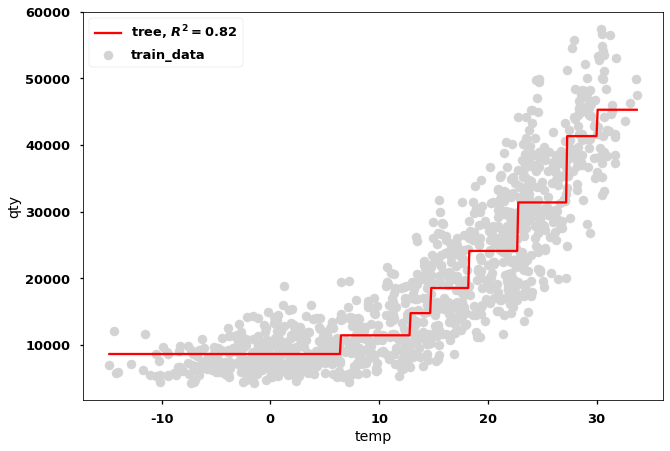

In [5]:
style.use('seaborn-talk')

krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

X = df1_w_s_all.loc[:,['temp']].values
y = df1_w_s_all.loc[:,'qty'].values

rm = DecisionTreeRegressor(max_depth=3)
rm.fit(X,y)

df1_w_s_all_array =df1_w_s_all.values

sort_idx = X.ravel().argsort()

r2 = r2_score(y[sort_idx], rm.predict(X[sort_idx]))

plt.scatter(X[sort_idx], y[sort_idx], c='lightgray', label='train_data')
plt.plot(X[sort_idx], rm.predict(X[sort_idx]), c='r', label='tree, $R^2=%.2f$' %r2)
plt.xlabel('temp')
plt.ylabel('qty')
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

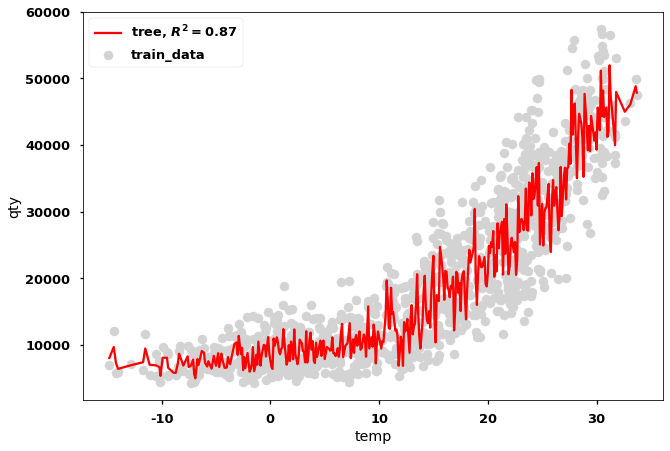

In [6]:
from sklearn.ensemble import RandomForestRegressor

style.use('seaborn-talk')

krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

X = df1_w_s_all.loc[:,['temp']].values
y = df1_w_s_all.loc[:,'qty'].values

rm = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
rm.fit(X,y)

df1_w_s_all_array =df1_w_s_all.values

sort_idx = X.ravel().argsort()

r2 = r2_score(y[sort_idx], rm.predict(X[sort_idx]))

plt.scatter(X[sort_idx], y[sort_idx], c='lightgray', label='train_data')
plt.plot(X[sort_idx], rm.predict(X[sort_idx]), c='r', label='tree, $R^2=%.2f$' %r2)
plt.xlabel('temp')
plt.ylabel('qty')
plt.legend()
plt.show

In [7]:
from matplotlib import style
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

R2 - Train: 0.876, Test: 0.799


<function matplotlib.pyplot.show(*args, **kw)>

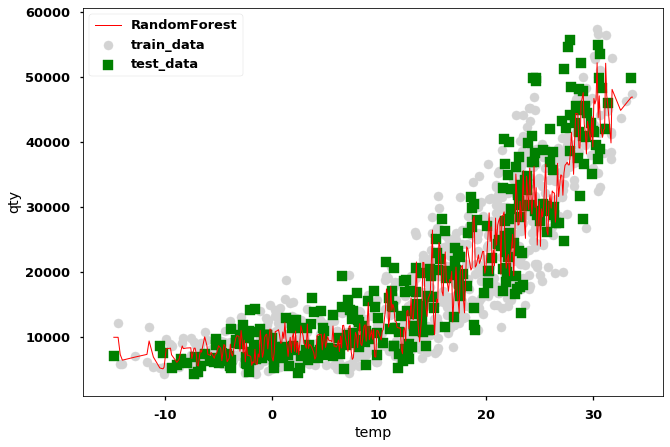

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('R2 - Train: %.3f, Test: %.3f' %(r2_train, r2_test))

sort_idx = X.ravel().argsort()
plt.plot(X[sort_idx], forest.predict(X[sort_idx]), c='r', lw=1, label='RandomForest')

plt.scatter(X_train, y_train, c='lightgray', marker='o', label='train_data')
plt.scatter(X_test, y_test, c='green', marker='s', label='test_data')
plt.xlabel('temp')
plt.ylabel('qty')
plt.legend()
plt.show

In [9]:
X = df1_w_s_all.loc[:, ['temp']].values
y = df1_w_s_all.loc[:,'qty'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('R2 - Train: %.3f, Test: %.3f' %(r2_train, r2_test))

R2 - Train: 0.876, Test: 0.799
